# **Normalization In Machine Learning**

**<h3>On this notebook we will study the impact that normalization has in a Linear Regression Model performance</h3>**



In [ ]:
from pandas import read_csv, DataFrame
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

**<h4>Let's begin by importing the data<h4>**
The dataset is about house pricing, we will try to predict the house prices through the size in squared feet and the number of bedrooms

In [ ]:
data= read_csv('house_price_prediction.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


**<h4>Now we mount out feature vector and the target variable vector<h4>**


*   Feature Vector **X** : ( Squared Feet, Bedrooms )
*   Target **Y** : Price



In [ ]:
X = data[['sqft_living', 'bedrooms']]
Y = data['price']

**<h4>The next step is to split the data in train-test subsets**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=40)

**<h4>We create and train the model**

In [ ]:
model = LinearRegression()
model = model.fit(x_train, y_train)

**<h4>We extract the models accuracy**

In [ ]:
accuracy = model.score(x_test, y_test)
accuracy = round(accuracy*100, 3)
print(f'Our Accuracy Without Normalization is: {accuracy}%')

Our Accuracy Without Normalization is: 45.98%


**Let's repeat but normalizing the data**

In [ ]:
normalized_X = (X-X.min())/(X.max()-X.min())

norm_x_train, norm_x_test, y_train, y_test = train_test_split(normalized_X,
                                                              Y,
                                                              test_size=0.2,
                                                              random_state=40)
model = LinearRegression()
model = model.fit(norm_x_train, y_train)
accuracy_with_normalization = model.score(norm_x_test, y_test)
accuracy_with_normalization = round(accuracy_with_normalization*100, 3)
print(f'Our accuracy with normalization is {accuracy_with_normalization}%')

Our accuracy with normalization is 45.98%


<BarContainer object of 2 artists>

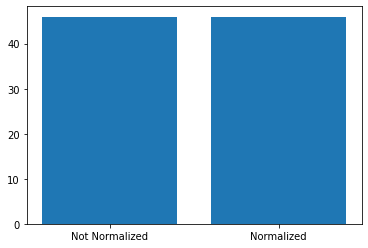

In [ ]:
scenarios = ['Not Normalized', 'Normalized']
accuracies = [accuracy, accuracy_with_normalization]

plt.bar(scenarios, accuracies)